In [68]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from scipy.io import loadmat

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Machine Learning  แบบไม่มีผู้สอน หรือก็คือไม่มีเฉลย หรือเรียกว่า class

การวิเคราะห์องค์ประกอบหลัก (Principal Component Analysis : PCA)
เป็นวิธีที่ใช้วิเคราะห์ข้อมูลหลายตัวแปร เพื่อหาความสัมพันธ์ของตัวแปรเหล่านั้นส่งผลทำให้เกิดการลดขนาด Metrix ที่มีความซับซ้อนเล็กลงง่ายต่อการอธิบาย นำมาประยุกต์ลดขนาดของคุณลักษณะ (Features) ให้มีขนาดเล็กลง ซึ่งจะส่งผลทำให้การสร้างโมเดลนั้นใช้เวลาน้อยลง

ยกตัวอย่าง สมมุติว่ามีตัวแปรหรือคุณลักษณะประมาณ 50 ตัว แต่อาจจะไม่ได้ใช้งานตัวแปรเหล่านี้ทั้งหมด เราต้องอาศัยการเรียงลำดับความสำคัญของตัวแปร
เช่น ตัวแปรใดบ้างส่งผลกระทบก็นำมาใช้งาน ตัวแปรใดแทบไม่มีเกี่ยวข้องเลยก็ไม่ต้องทำมาใช้งานนั่นเอง หลักการง่ายๆนี้แหละเรียกว่า (Principal Component Analysis : PCA)

PCA จะทำการสร้างตัวแปรที่เรียกว่า component โดยแต่ละ component จะไม่มีความสัมพันธ์กันเลย component ตัวแรกจะมีค่า variance สูงที่สุด ซึ่งจะอธิบาย ข้อมูลได้มากที่สุด และตัวถัดๆ ไปก็จะมี variance ลดลงตามลำดับ จำนวน component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance ประมาณ 80–90%

Variance Explained คือความผันแปรของแต่ละองค์ประกอบ




In [69]:
x,y = make_blobs(n_samples=100,n_features=10)
print(f"X before = {x.shape}")
print(f"Y before = {y.shape}")


X before = (100, 10)
Y before = (100,)


In [70]:
pca = PCA(n_components=4)
pca.fit(x)
x = pca.transform(x)
print(f"X after = {x.shape}")


X after = (100, 4)


In [71]:
print(pca.n_components_)

4


In [72]:
print(pca.explained_variance_ratio_)

[0.663936   0.30991655 0.00477916 0.00438516]


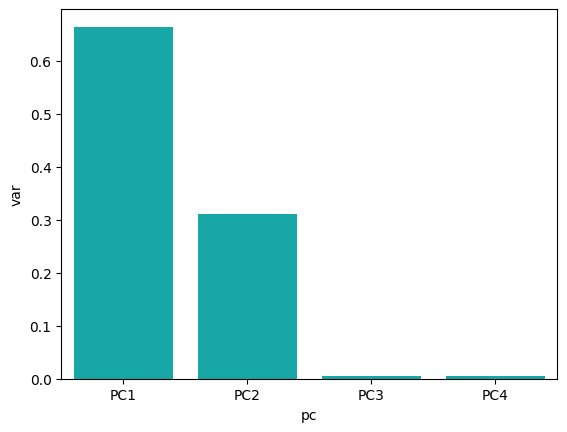

In [73]:
df = pd.DataFrame({'var': pca.explained_variance_ratio_ , 'pc':["PC1","PC2","PC3","PC4"]})
sns.barplot(x='pc',y="var", data=df, color="c")
plt.show()

# ค่าแรก var สูงสุด แล้วค่อย ๆ ลดลงมา เสมอ!

PCA with Model (Iris Dataset)

In [74]:
iris = sns.load_dataset('iris')
x = iris.drop('species',axis=1) # จะลดให้เหลือแค่ 3 attribute from now 4 attribute
y = iris["species"]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
print(f"X Before: {x.shape}")

X Before: (150, 4)


In [76]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)
print(f"X After: {x_pca.shape}")

X After: (150, 3)


In [77]:
x["PCA1"] = x_pca[:,0]
x["PCA2"] = x_pca[:,1]
x["PCA3"] = x_pca[:,2]

x 
# แสดงให้เห็นว่า ตอนนี้ x_pca ที่ผ่านการ PCA แล้ว จะเหลือค่าแค่ 3 ค่า คือค่า attribute 
# ที่แสดงใน column PCA1, PCA2, PCA3 เท่านั้น ไม่ใช่ค่า attribute 
# ที่แสดงใน sepal_length, sepal_width, petal_length, petal_width ซึ่งไม่ได้ใช้แล้ว

,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,-2.728717,0.326755,0.090079
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.944110,0.187532,0.177825
146,6.3,2.5,5.0,1.9,1.527167,-0.375317,-0.121898
147,6.5,3.0,5.2,2.0,1.764346,0.078859,0.130482
148,6.2,3.4,5.4,2.3,1.900942,0.116628,0.723252


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4)

# Complete Data
x_train = x_train.loc[:,['PCA1','PCA2','PCA3']]
x_test = x_test.loc[:,['PCA1','PCA2','PCA3']]



In [79]:
model= GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [80]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")

Accuracy = 0.8666666666666667


PCA with Model (MNIST Dataset)

In [129]:
mnist_raw = loadmat("/Users/phutharesuanwachirapisut/Downloads/Programming/Dataset/mnist-original.mat")
mnist = {
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}
x_train, x_test, y_train, y_test = train_test_split(mnist['data'], mnist["target"], random_state=0)
print(f"x_train before PCA :{x_train.shape}")

x_train before PCA :(52500, 784)


In [156]:
# pca = PCA(0.95) # ลดขนาดให้เหลือ 95%
pca = PCA(0.99) # ลดขนาดให้เหลือ 99%
x_train_1 = pca.fit_transform(x_train)
print(f"x_train after PCA :{x_train_1.shape}")

x_train after PCA :(52500, 331)


In [157]:
data = pca.fit_transform(x_train)
result = pca.inverse_transform(data)

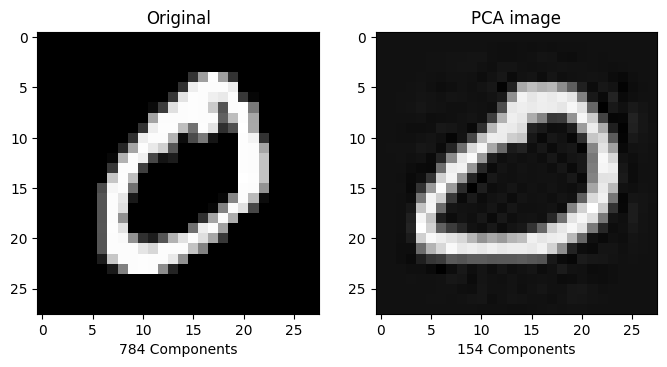

In [158]:
# show image
    # feature ในสถานการณ์นี้คือ ความละเอียดของภาพ หรือก็คือ components
plt.figure(figsize=(8,4))

# image feature 784
plt.subplot(1, 2, 1) 
plt.imshow(mnist['data'][0].reshape(28,28), cmap=plt.cm.gray, interpolation="nearest")
plt.xlabel("784 Components")
plt.title("Original")

# image feature 95% -> 154
plt.subplot(1, 2, 2)
plt.imshow(result[0].reshape(28,28), cmap=plt.cm.gray, interpolation="nearest")
plt.xlabel("154 Components")
plt.title("PCA image")
plt.show()